### Networkx Python3

In [2]:
import networkx as nx

#### 1. Creating Graphs

In [2]:
g_undirected = nx.Graph() # Creating a undirected graph
g_directed = nx.DiGraph() # Creating a directed graph

-------------

#### 2. Nodes and Node Objects

In [7]:
g_undirected.add_node(1)
g_undirected.add_nodes_from([1,2,3,4,5])
g_undirected.remove_node(2)

##### 2.a. Container of nodes from Path Graph

In [6]:
h = nx.path_graph(5)
g_undirected.add_nodes_from(h)

##### 2.b. Node Objects: A node can be any hashable object such as a string, a function, a file and more.

In [10]:
import math
g = nx.Graph()
g.add_node('string')
g.add_node(math.cos) # cosine function
f = open('temp.txt', 'w') # file handle
g.add_node(f)
print(g.nodes())

['string', <built-in function cos>, <_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'>]


-------------

#### 3. Edges

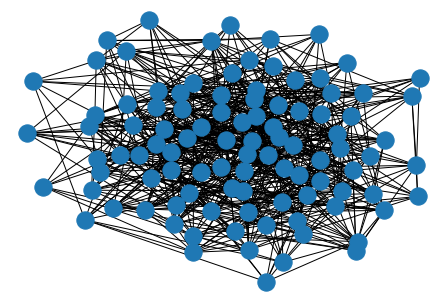

In [95]:
# Single edge
g.add_edge(1, 2)
e = (2, 3)
g.add_edge(*e) # unpack tuple
nx.draw(g)

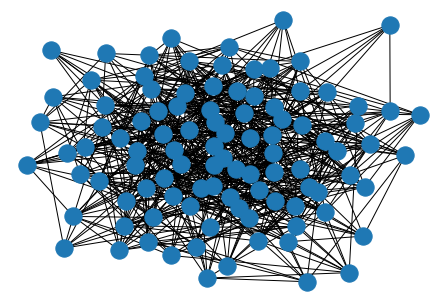

In [96]:
# List of edges
g.add_edges_from([(1, 2), (1, 3)])
nx.draw(g)

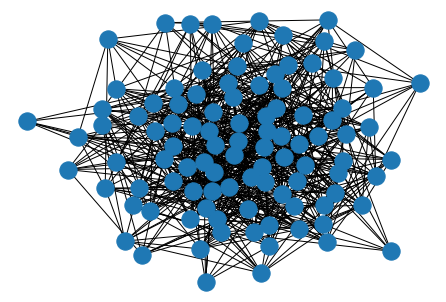

In [97]:
# A container of edges
g.add_edges_from(h.edges())
nx.draw(g)

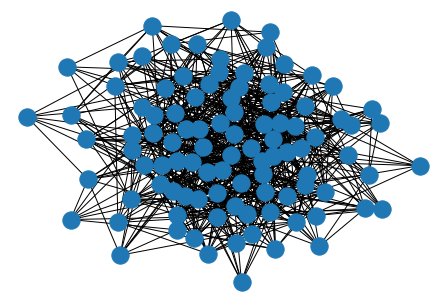

In [98]:
# You can also remove any edge
g.remove_edge(1, 2)
nx.draw(g)

-------------

#### 4. Nodes and Edges Metrics

In [16]:
g.add_edges_from([(1, 2), (1, 3)])

In [17]:
g.add_node('a')

In [18]:
g.number_of_nodes() # also g.order()

9

In [19]:
g.number_of_edges() # also g.size()

5

In [20]:
g.nodes()

NodeView(('string', <built-in function cos>, <_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'>, 1, 2, 3, 0, 4, 'a'))

In [101]:
g.edges()

EdgeView([(0, 11), (0, 27), (0, 36), (0, 37), (0, 49), (0, 50), (0, 52), (0, 56), (0, 58), (0, 60), (0, 64), (0, 90), (0, 1), (1, 6), (1, 34), (1, 38), (1, 50), (1, 52), (1, 55), (1, 57), (1, 59), (1, 60), (1, 67), (1, 82), (1, 84), (1, 92), (1, 93), (1, 3), (2, 11), (2, 20), (2, 33), (2, 39), (2, 41), (2, 46), (2, 47), (2, 50), (2, 53), (2, 54), (2, 55), (2, 66), (2, 70), (2, 73), (2, 87), (2, 88), (2, 89), (2, 90), (2, 91), (2, 96), (2, 3), (3, 5), (3, 22), (3, 24), (3, 27), (3, 28), (3, 30), (3, 33), (3, 35), (3, 40), (3, 53), (3, 61), (3, 64), (3, 66), (3, 68), (3, 75), (3, 79), (3, 83), (3, 4), (4, 10), (4, 11), (4, 12), (4, 13), (4, 25), (4, 42), (4, 43), (4, 50), (4, 51), (4, 56), (4, 59), (4, 62), (4, 66), (4, 67), (4, 69), (4, 70), (4, 74), (4, 85), (4, 98), (4, 99), (5, 18), (5, 34), (5, 35), (5, 43), (5, 44), (5, 51), (5, 57), (5, 67), (5, 74), (5, 79), (5, 84), (5, 91), (5, 93), (5, 97), (5, 98), (6, 12), (6, 17), (6, 58), (6, 65), (6, 69), (6, 73), (6, 74), (6, 76), (6, 83

In [22]:
g.neighbors(1)

In [23]:
g.degree(1)

3

##### 4.a. Node Iteration

In [32]:
g.add_edge(1, 2)
for node in g.nodes(): # or node in g.nodes_iter():
    print(node, g.degree(node))

string 0
<built-in function cos> 0
<_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'> 0
1 3
2 2
3 3
0 1
4 1
a 0


##### 4.b. Edge Iteration

In [48]:
g.add_edge(1, 3, weight=2.5)
g.add_edge(1, 2, weight=1.5)
for n1, n2, attr in list(g.edges(data=True)):
    try:
        w = attr['weight']
    except:
        w = 0
        
            
    print(n1, n2, w)

1 3 2.5
1 0 0
1 2 1.5
2 3 0
3 4 0


-------------

#### 5. Working with Dictionaries

#### NetworkX takes advantage of Python dictionaries to store node and edge measures. The dict type is a data structure that represents a key-value mapping.

In [24]:
# Keys and values can be of any data type
fruit_dict = {'apple': 1, 'orange': [0.12, 0.02], 42: True}

In [25]:
# Can retrieve the keys and values as Python lists (vector)
fruit_dict.keys()

dict_keys(['apple', 'orange', 42])

In [26]:
# Or (key, value) tuples
fruit_dict.items()

dict_items([('apple', 1), ('orange', [0.12, 0.02]), (42, True)])

#### Conclusion: In access mode, any NetworkX graph behaves like a Python dictionary with nodes as primary keys

-------------

#### 6. Weighted Graphs and Directed Graphs

In [49]:
g.add_edge(1, 2, weight=4.0)
g[1][2]['weight'] = 5.0 # edge already added
g[1][2]

{'weight': 5.0}

In [50]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1, 4, 0.5), (3, 1, 0.75)])

In [51]:
dg.out_degree(1, weight='weight')

0.5

In [52]:
dg.degree(1, weight='weight')

1.25

In [53]:
dg.successors(1)

In [54]:
dg.predecessors(1)

#### 7. Graph Operators cheat sheet

In [55]:
nx.subgraph(G, nbunch) # inducae subgraph of G on nodes in nbunch
nx.union(G1, G2) # graph union, G1 and G2 must be disjoint
nx.cartesian_product(G1, G2) # return Cartesian product graph
nx.compose(G1, G2) # combine graphs identifying nodes common to both
nx.complement(G) # graph complement
nx.create_empty_copy(G) # return an empty copy of the same graph class
nx.convert_to_undirected(G) # return an undirected representation of G
nx.convert_to_directed(G) # return a directed representation of G

SyntaxError: invalid syntax (1081473089.py, line 1)

#### 8. Graph Generators

In [ ]:
# small scale famous graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

In [ ]:
# Random Graphs
er = nx.erdos_renyi_graph(100, 0.15)
red = nx.random_lobster(100, 0.9, 0.9) 

In [148]:
?nx.random_lobster

#### 9. Reading and Writing Graph Data

In [ ]:
g = nx.read_<format>(‘path/to/file.txt’,...options...)
nx.write_<format>(g,‘path/to/file.txt’,...options...)

In [ ]:
g = nx.read_edgelist(path, comments='#', create_using=None, delimiter=' ', nodetype=None, data=True, edgetype=None, encoding='utf-8')
nx.write_edgelist(g, path, comments='#', delimiter=' ', data=True, encoding='utf-8')

#### 10. Working with Graph Data

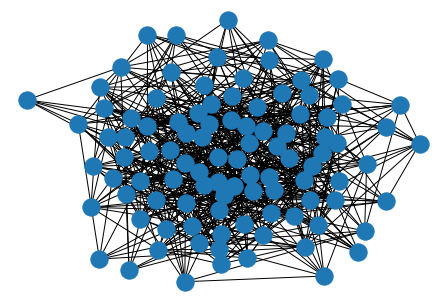

In [60]:
import pylab as plt #import Matplotlib plotting interface
g = nx.erdos_renyi_graph(100, 0.15)
nx.draw(g)

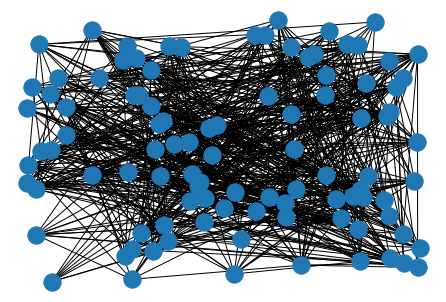

In [61]:
nx.draw_random(g)

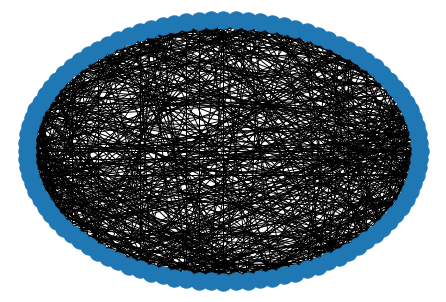

In [62]:
nx.draw_circular(g)

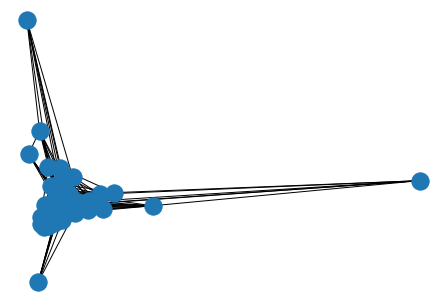

In [63]:
nx.draw_spectral(g)

In [64]:
plt.savefig('graph.png') #Saving the output graph for viz.

<Figure size 432x288 with 0 Axes>

#### 11. Network Analysis

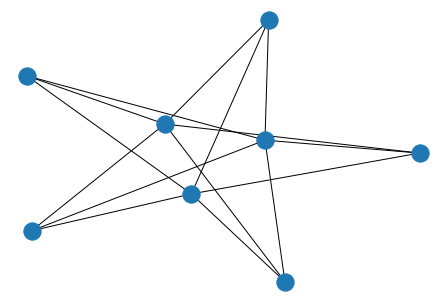

In [70]:
new_G = nx.complete_bipartite_graph(3, 5)
nx.draw(new_G)

In [73]:
N, K = new_G.order(), new_G.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)

Nodes:  8
Edges:  15
Average degree:  1.875


Nodes:  10
Edges:  15
Average degree:  1.5


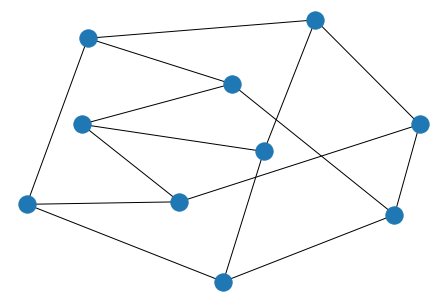

In [76]:
new_G = nx.petersen_graph()
nx.draw(new_G)
N, K = new_G.order(), new_G.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)

Nodes:  10
Edges:  9
Average degree:  0.9


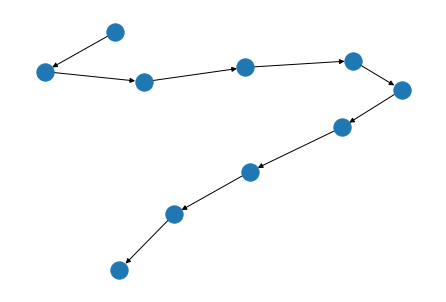

In [86]:
new_G = nx.random_graphs.(10, create_using=nx.DiGraph)
nx.draw(new_G)
N, K = new_G.order(), new_G.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)

In [114]:
?nx.erdos_renyi_graph

In [119]:
?nx.draw

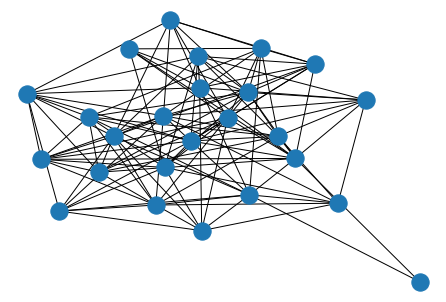

In [117]:
g = nx.erdos_renyi_graph(25, 0.40)
nx.draw(g)

In [118]:
clustering_coeffs = nx.clustering(g)
clustering_coeffs

{0: 0.4222222222222222,
 1: 0.4444444444444444,
 2: 0.4090909090909091,
 3: 0.35555555555555557,
 4: 1.0,
 5: 0.4166666666666667,
 6: 0.4888888888888889,
 7: 0.5357142857142857,
 8: 0.3111111111111111,
 9: 0.4727272727272727,
 10: 0.38461538461538464,
 11: 0.4666666666666667,
 12: 0.5,
 13: 0.38181818181818183,
 14: 0.4666666666666667,
 15: 0.42857142857142855,
 16: 0.3888888888888889,
 17: 0.3717948717948718,
 18: 0.2777777777777778,
 19: 0.3484848484848485,
 20: 0.5357142857142857,
 21: 0.2909090909090909,
 22: 0.4642857142857143,
 23: 0.4727272727272727,
 24: 0.42857142857142855}

TypeError: draw_random() missing 1 required positional argument: 'G'

In [3]:
?nx.random_k_out_graph

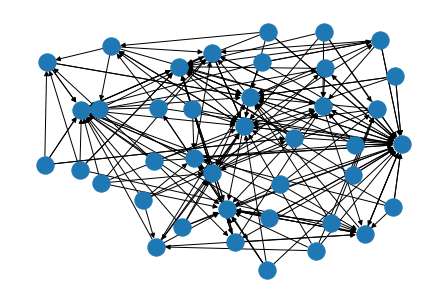

In [4]:
dg = nx.random_k_out_graph(40, 5, 0.3, seed=1)
nx.draw(dg)

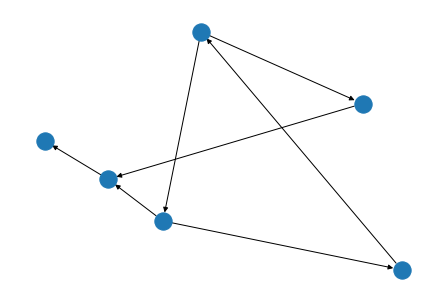

In [122]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1, 4, 0.5), (3, 1, 0.75), (2,1,0), (3,5,0), (5,7,0), (7,3,0), (7,2,0), (1, 4, 0.5), ])
nx.draw(dg)

In [5]:
dict(dg.in_degree())

{0: 4,
 1: 5,
 2: 0,
 3: 0,
 4: 1,
 5: 21,
 6: 0,
 7: 0,
 8: 0,
 9: 14,
 10: 0,
 11: 3,
 12: 6,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 4,
 18: 0,
 19: 5,
 20: 10,
 21: 17,
 22: 3,
 23: 1,
 24: 0,
 25: 34,
 26: 0,
 27: 13,
 28: 8,
 29: 0,
 30: 0,
 31: 0,
 32: 3,
 33: 19,
 34: 18,
 35: 8,
 36: 3,
 37: 0,
 38: 0,
 39: 0}

In [6]:
in_degrees = dict(dg.in_degree())
in_values =  sorted(set(in_degrees.values()))
in_values #list of unique in-degrees

[0, 1, 3, 4, 5, 6, 8, 10, 13, 14, 17, 18, 19, 21, 34]

In [7]:
in_degree_values = list(in_degrees.values())
in_degree_values

[4,
 5,
 0,
 0,
 1,
 21,
 0,
 0,
 0,
 14,
 0,
 3,
 6,
 0,
 0,
 0,
 0,
 4,
 0,
 5,
 10,
 17,
 3,
 1,
 0,
 34,
 0,
 13,
 8,
 0,
 0,
 0,
 3,
 19,
 18,
 8,
 3,
 0,
 0,
 0]

In [8]:
in_hist = [in_degree_values.count(x) for x in in_values]
in_hist

[19, 2, 4, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]

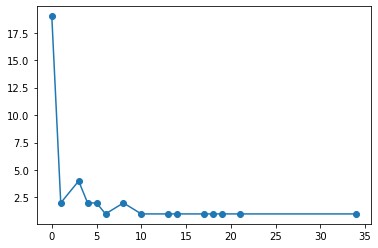

In [10]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(in_values, in_hist, 'o-')

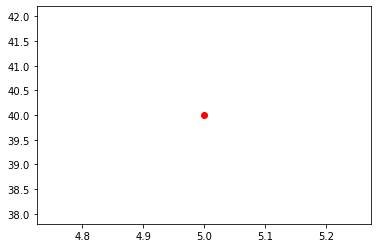

In [13]:
out_degrees = dict(dg.out_degree())
out_values =  sorted(set(out_degrees.values()))
out_values #list of unique in-degrees
out_degree_values = list(out_degrees.values())
out_hist = [out_degree_values.count(x) for x in out_values]
from matplotlib import pyplot as plt
plt.figure()
plt.plot(out_values, out_hist, 'ro-')

In [14]:
out_degrees

{0: 5,
 1: 5,
 2: 5,
 3: 5,
 4: 5,
 5: 5,
 6: 5,
 7: 5,
 8: 5,
 9: 5,
 10: 5,
 11: 5,
 12: 5,
 13: 5,
 14: 5,
 15: 5,
 16: 5,
 17: 5,
 18: 5,
 19: 5,
 20: 5,
 21: 5,
 22: 5,
 23: 5,
 24: 5,
 25: 5,
 26: 5,
 27: 5,
 28: 5,
 29: 5,
 30: 5,
 31: 5,
 32: 5,
 33: 5,
 34: 5,
 35: 5,
 36: 5,
 37: 5,
 38: 5,
 39: 5}